In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_df = pd.read_csv('StudentPerformanceFactors.csv')

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
# Calculer les quartiles pour les variables numériques
numerical_columns = ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                     'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 
                     'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 
                     'Distance_from_Home', 'Exam_Score']

# Obtenir les quartiles pour les variables numériques
quartiles = data_df[numerical_columns].quantile([0.25, 0.5, 0.75])

# Afficher les quartiles
print("Quartiles pour chaque variable:\n", quartiles)


Quartiles pour chaque variable:
       Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
0.25           16.0        70.0          6.0             63.0   
0.50           20.0        80.0          7.0             75.0   
0.75           24.0        90.0          8.0             88.0   

      Tutoring_Sessions  Physical_Activity  Exam_Score  
0.25                1.0                2.0        65.0  
0.50                1.0                3.0        67.0  
0.75                2.0                4.0        69.0  


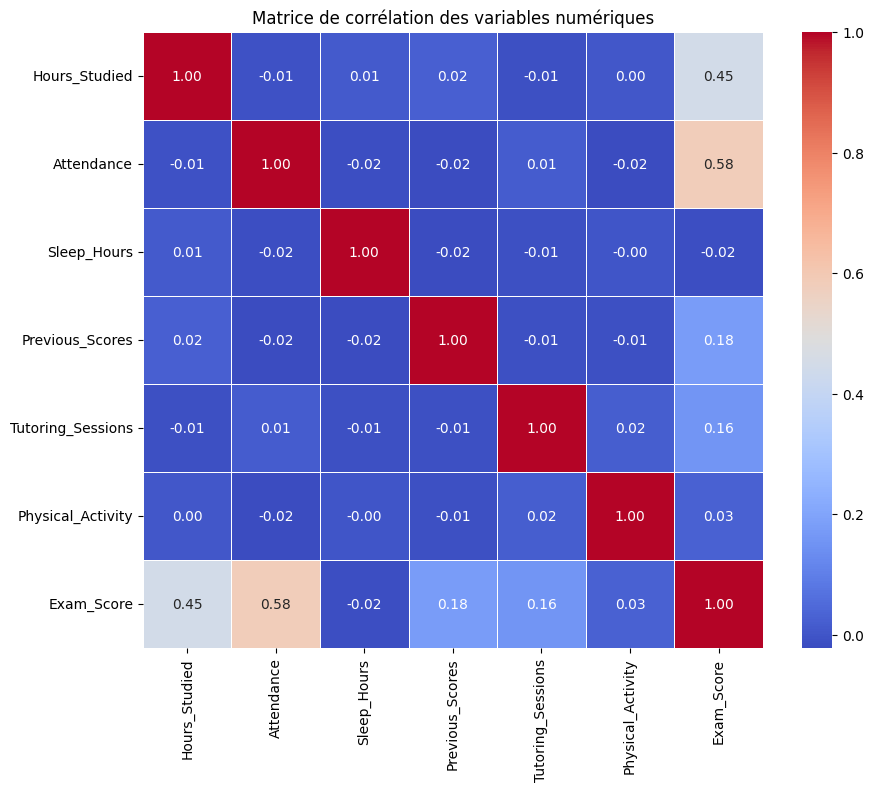

In [14]:
# Corrélations entre les variables
correlation_matrix = data_df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de corrélation des variables numériques")
plt.show()


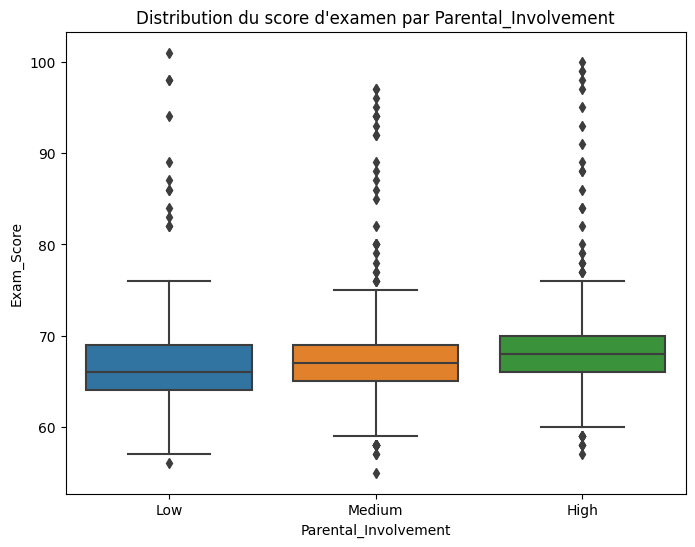

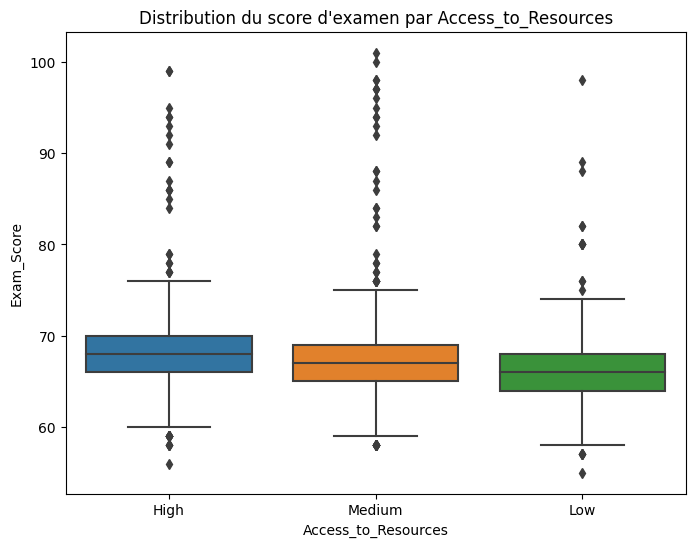

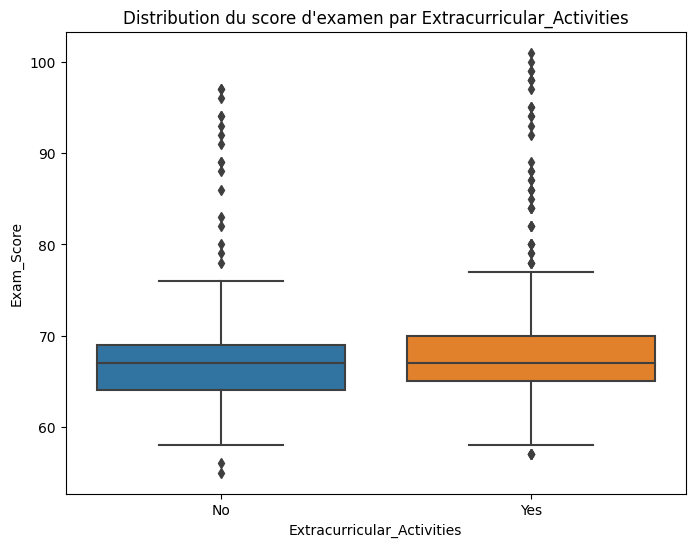

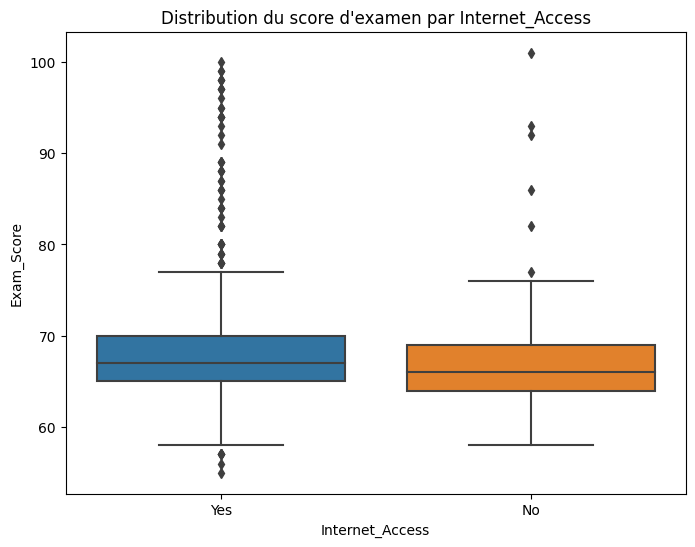

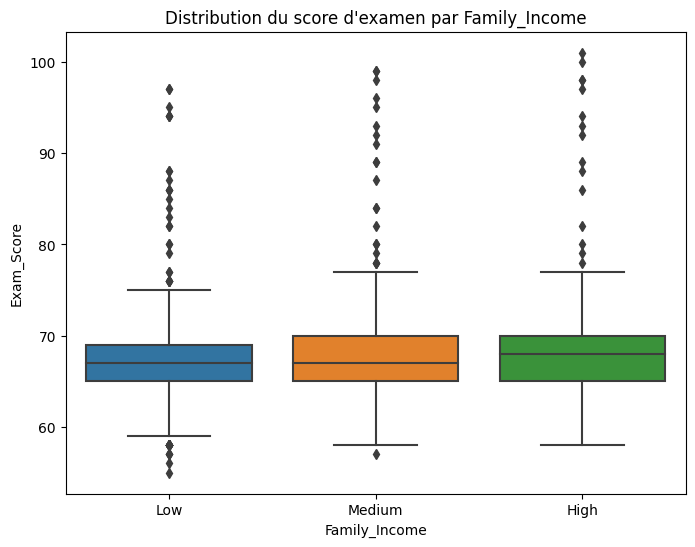

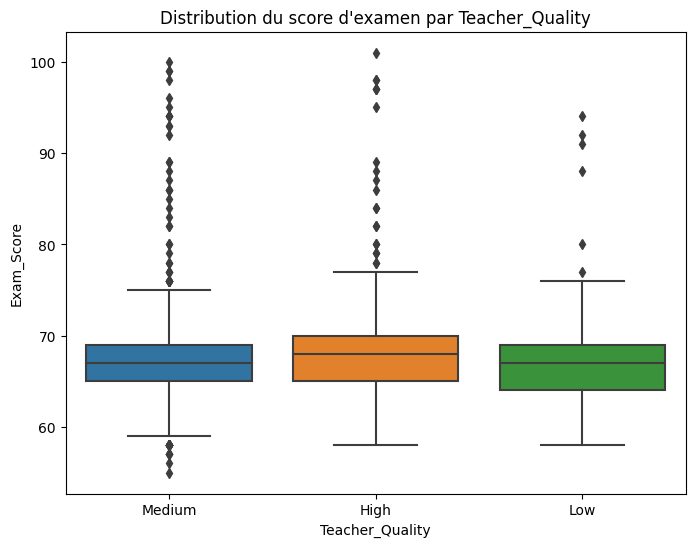

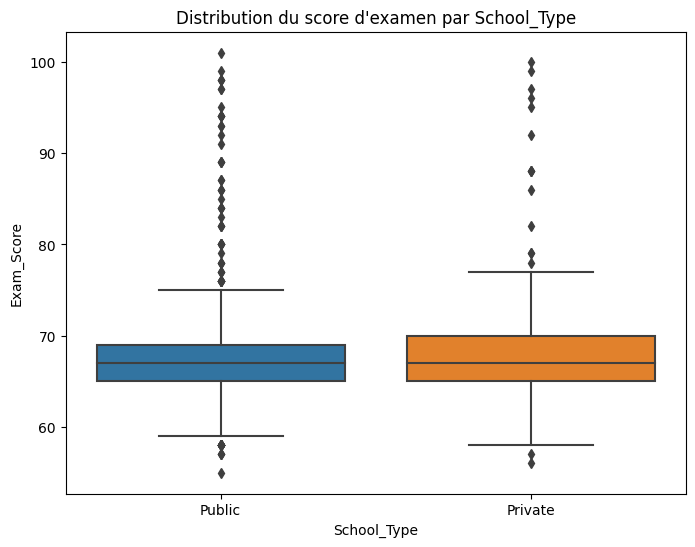

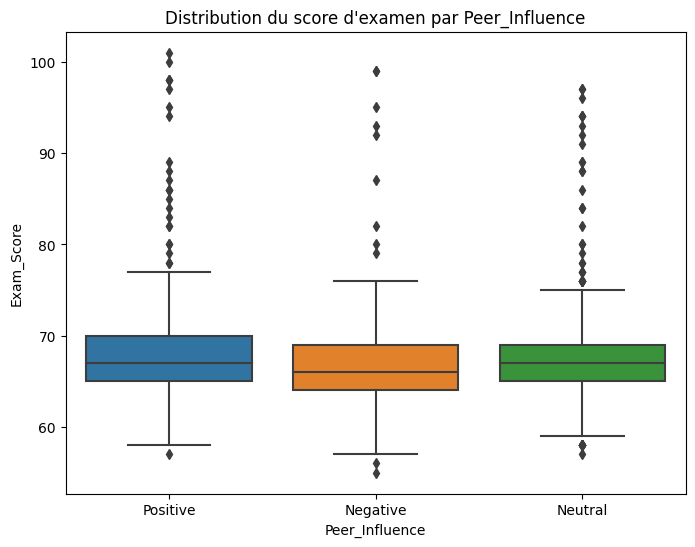

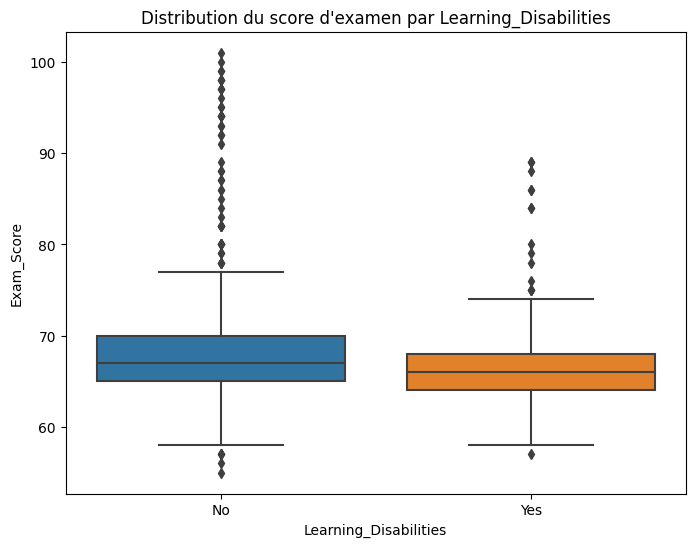

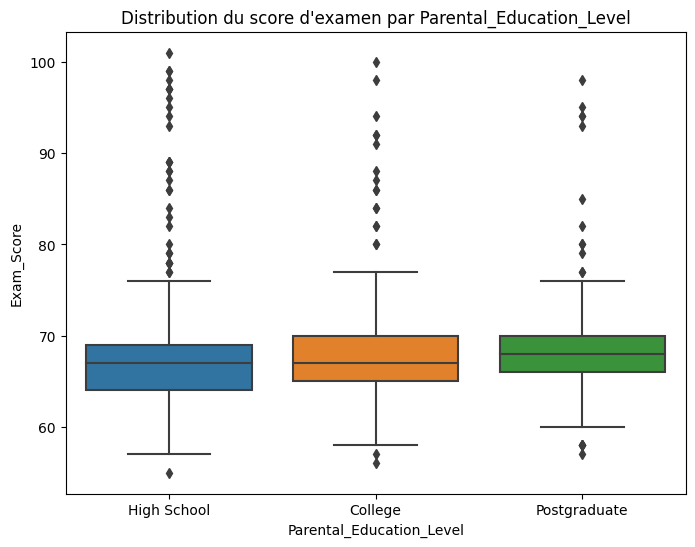

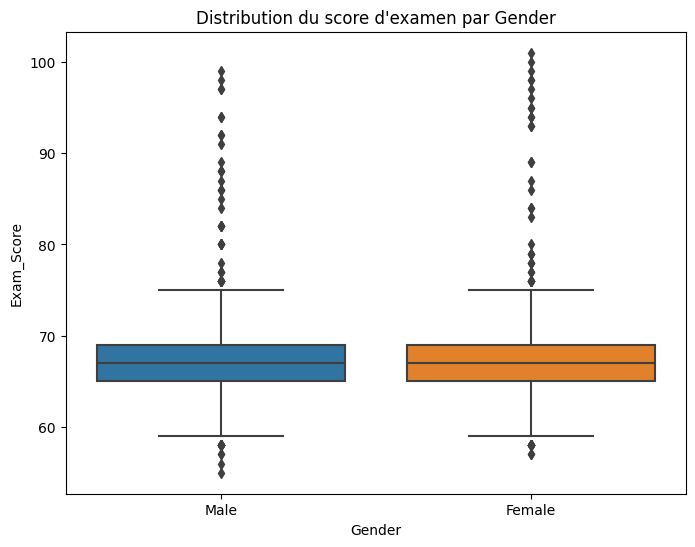

In [13]:
# Analyser la distribution du score d'examen pour chaque variable catégorielle
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                       'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 
                       'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Gender']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, y='Exam_Score', data=data_df)
    plt.title(f'Distribution du score d\'examen par {column}')
    plt.show()

# Identifier les étudiants à risque
# Par exemple, identifier les étudiants avec des scores d'examen faibles
low_exam_scores = data_df[data_df['Exam_Score'] <= quartiles.loc[0.25, 'Exam_Score']]